# Story 3

*Do stricter gun laws reduce firearm gun deaths?*

In [79]:
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium


## Datasources

We can use the below NCHS API endpoint to see cause of death rates per state *per quarter* in the US. This will be a good starting point as we look to visualize per state

- [NCHS Leading Cause of Deathe API Endpoint](https://dev.socrata.com/foundry/data.cdc.gov/bi63-dtpu)

In [80]:
# Grabbing data from API endpoint
response = requests.get("https://data.cdc.gov/resource/489q-934x.json").json()

In [81]:
# Write response to pandas dataframe
df = pd.json_normalize(response)
df.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_alaska,rate_alabama,...,rate_age_1_4,rate_age_5_14,rate_age_15_24,rate_age_25_34,rate_age_35_44,rate_age_45_54,rate_age_55_64,rate_65_74,rate_age_75_84,rate_age_85_plus
0,2022 Q1,12 months ending with quarter,All causes,Age-adjusted,"Deaths per 100,000",873.2,729.4,1038,944.5,1109.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022 Q1,12 months ending with quarter,Alzheimer disease,Age-adjusted,"Deaths per 100,000",30.6,35,23.8,28.5,45.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022 Q1,12 months ending with quarter,COVID-19,Age-adjusted,"Deaths per 100,000",95,75.2,119.1,121.3,133.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022 Q1,12 months ending with quarter,Cancer,Age-adjusted,"Deaths per 100,000",145.9,127.4,170.9,156,159.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022 Q1,12 months ending with quarter,Chronic liver disease and cirrhosis,Age-adjusted,"Deaths per 100,000",14.4,10.3,18.9,25.5,16.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

In [82]:
# Pulling out only firearm deaths that are age-adjusted
df = df.loc[(df.cause_of_death == "Firearm-related injury") & (df.rate_type == "Age-adjusted") & (df.time_period=="3-month period")]

In [83]:
# Select only needed columns and transpose our data
state_cols = ['year_and_quarter', 'rate_alaska', 'rate_alabama', 'rate_arkansas', 'rate_arizona',
              'rate_california', 'rate_colorado', 'rate_connecticut',
              'rate_district_of_columbia', 'rate_delaware', 'rate_florida',
              'rate_georgia', 'rate_hawaii', 'rate_iowa', 'rate_idaho',
              'rate_illinois', 'rate_indiana', 'rate_kansas', 'rate_kentucky',
              'rate_louisiana', 'rate_massachusetts', 'rate_maryland', 'rate_maine',
              'rate_michigan', 'rate_minnesota', 'rate_missouri', 'rate_mississippi',
              'rate_montana', 'rate_north_carolina', 'rate_north_dakota',
              'rate_nebraska', 'rate_new_hampshire', 'rate_new_jersey',
              'rate_new_mexico', 'rate_nevada', 'rate_new_york', 'rate_ohio',
              'rate_oklahoma', 'rate_oregon', 'rate_pennsylvania',
              'rate_rhode_island', 'rate_south_carolina', 'rate_south_dakota',
              'rate_tennessee', 'rate_texas', 'rate_utah', 'rate_virginia',
              'rate_vermont', 'rate_washington', 'rate_wisconsin',
              'rate_west_virginia', 'rate_wyoming', 'rate_overall']
df = df[state_cols].transpose()

# Set the first row (year_and_quarter) as column headers and remove it from the data
df.columns = df.iloc[0]
df = df.drop(df.index[0])

# Clean up state names and set index
df['state'] = [s.replace("_", " ").replace("rate", "").title().strip() for s in df.index]
df = df.set_index('state')

# Convert column data to float, skipping over missing data (NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned DataFrame
df.head()

year_and_quarter,2022 Q1,2022 Q2,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1
state,,,,,,,,,
Alaska,22.8,20.2,24.4,22.3,18.7,24.4,23.3,27.6,NaN
Alabama,24.1,26.7,27.7,23.5,27.9,25.7,25.1,23.6,NaN
Arkansas,19.1,25.0,23.4,20.0,22.7,23.3,21.9,19.6,NaN
Arizona,18.6,22.6,20.7,18.6,18.0,18.3,18.9,18.8,NaN
California,8.3,8.9,9.4,7.9,8.1,7.7,8.4,7.4,NaN


## Data Visualization
Let's first plot the rate of firearm related homo

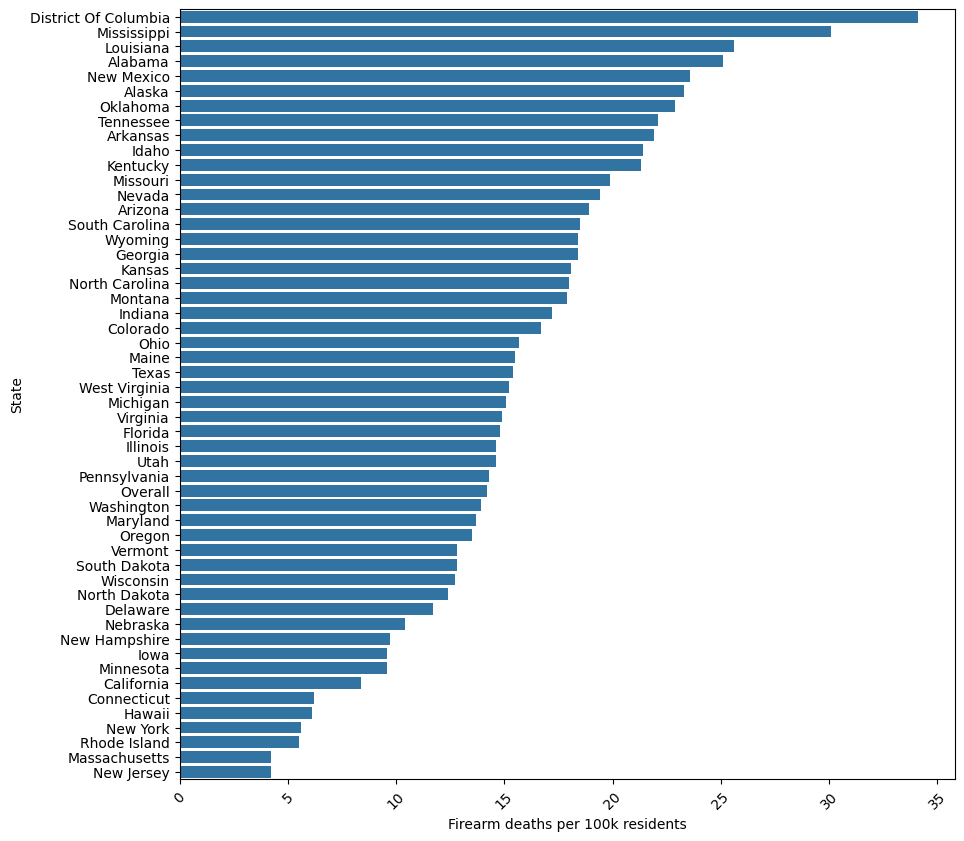

In [84]:
df_sorted = df.sort_values("2023 Q3", ascending=False)
order = df.groupby("state").sum().sort_values(['2023 Q3'], ascending=False).index

# Plot a sorted bar chart of deaths per 100k
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df, x="2023 Q3", y="state", order=order, orient="h")
ax.set_xlabel("Firearm deaths per 100k residents")
ax.set_ylabel("State")
plt.xticks(rotation=45)

plt.show()

In [85]:
#  firearm mortality
df_firearm_mortality = pd.read_csv('https://raw.githubusercontent.com/waheeb123/Datasets/refs/heads/main/data-table.csv')

# Check the structure of the data
df_firearm_mortality.head()


,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,25.5,"1,278",/nchs/pressroom/states/alabama/al.htm
1,2022,AK,22.4,164,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,20.1,"1,535",/nchs/pressroom/states/arizona/az.htm
3,2022,AR,21.9,666,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,8.6,"3,484",/nchs/pressroom/states/california/ca.htm


In [86]:
# Load the gun law scorecard data
df_gun_law = pd.read_csv('https://raw.githubusercontent.com/waheeb123/Datasets/refs/heads/main/gifford-gun-law-scorecard.csv')

# Map the grades to a 5-point Likert scale
grade_to_likert = {
    'A': 5, 'A-': 5,
    'B+': 4, 'B': 4,
    'C+': 3, 'C': 3, 'C-': 3,
    'D+': 2, 'D': 2, 'D-': 2,
    'F': 1
}

# Apply the mapping to create a Likert scale column
df_gun_law['Likert_Scale'] = df_gun_law['grade'].map(grade_to_likert)

# Preview the DataFrame
df_gun_law.head()


,state,grade,Likert_Scale
0,Alabama,F,1
1,Alaska,F,1
2,Arizona,F,1
3,Arkansas,F,1
4,California,A,5


I have Created 5-Point Likert Scale for Gun Control Laws
We will assign each state to a Likert bin based on the gun law rankings from the gifford-gun-law-scorecard.csv file:

A / A-: Likert scale = 5 (Strictest laws)

B / B+: Likert scale = 4

C / C+: Likert scale = 3

D / D-: Likert scale = 2

F: Likert scale = 1 (Most lax laws)

2. Merge Gun Law Likert Scale Data with Firearm Mortality Data

In [87]:
# Dictionary to convert state abbreviations to full state names
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map state abbreviations to full state names
df_firearm_mortality['state_full'] = df_firearm_mortality['STATE'].map(us_state_abbrev)

# Now you can merge using 'state_full' and 'state' in df_gun_law
df_combined = pd.merge(df_firearm_mortality, df_gun_law, left_on='state_full', right_on='state', how='inner')

# Drop the 'URL' and 'state_full' columns
df_combined = df_combined.drop(columns=['URL', 'state'])
# Preview the combined DataFrame
df_combined.head()



,YEAR,STATE,RATE,DEATHS,state_full,grade,Likert_Scale
0,2022,AL,25.5,"1,278",Alabama,F,1
1,2022,AK,22.4,164,Alaska,F,1
2,2022,AZ,20.1,"1,535",Arizona,F,1
3,2022,AR,21.9,666,Arkansas,F,1
4,2022,CA,8.6,"3,484",California,A,5


3. Visualize the Relationship Using Heat Maps

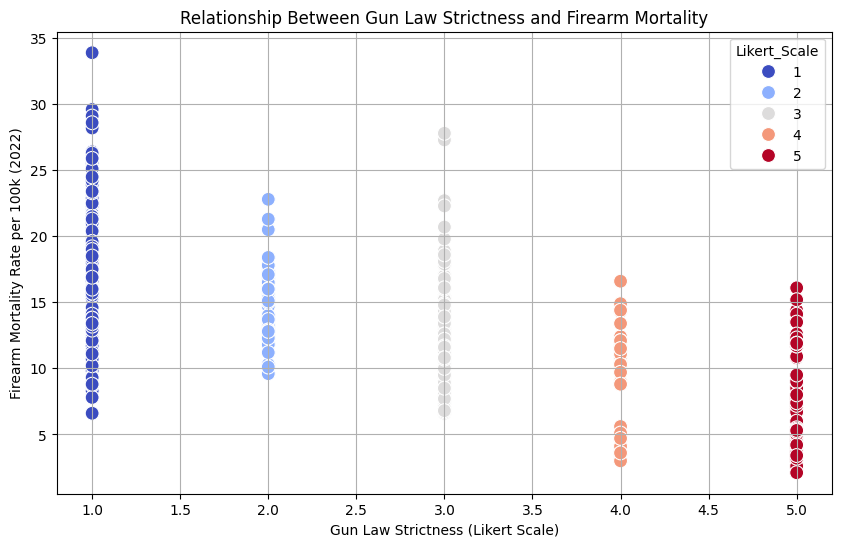

In [88]:
# Scatterplot: Likert scale vs firearm death rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Likert_Scale', y='RATE', hue='Likert_Scale', palette='coolwarm', s=100)
plt.title('Relationship Between Gun Law Strictness and Firearm Mortality')
plt.xlabel('Gun Law Strictness (Likert Scale)')
plt.ylabel('Firearm Mortality Rate per 100k (2022)')
plt.grid(True)
plt.show()


In [97]:
import folium
import requests

# Load a GeoJSON file for state boundaries
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
geojson_data = requests.get(url).json()

# Create a folium map
us_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Choropleth for Gun Law Strictness (Likert scale)
folium.Choropleth(
    geo_data=geojson_data,
    name='Gun Law Strictness (Likert Scale)',
    data=df_combined,
    columns=['state_full', 'Likert_Scale'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Gun Law Strictness (Likert Scale)'
).add_to(us_map)

# Add tooltips with state names
folium.GeoJson(
    geojson_data,
    name='State Names',
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],
        aliases=['state_full:'],
        localize=True,
        sticky=False,
        labels=True,
        style="background-color: white; color: black; font-size: 14px; font-weight: bold;"
    )
).add_to(us_map)

# Add Layer Control
folium.LayerControl().add_to(us_map)

# Save the map to an HTML file
us_map.save('us_gun_law_map_interactive.html')

# Display the map in Google Colab
from google.colab import files
files.download('us_gun_law_map_interactive.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
# Load a GeoJSON file for state boundaries
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
geojson_data = requests.get(url).json()

# Create a folium map
us_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Choropleth for Gun Law Strictness (Likert scale)
folium.Choropleth(
    geo_data=geojson_data,
    name='Gun Law Strictness (Likert Scale)',
    data=df_combined,
    columns=['state_full', 'Likert_Scale'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Gun Law Strictness (Likert Scale)'
).add_to(us_map)

# Display the map
us_map